<a href="https://colab.research.google.com/github/dikshasaraswa/Face-Mask-Detection-using-CNN/blob/main/FaceDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install kaggle

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("omkargurav/face-mask-dataset")

print("Path to dataset files:", path)

100%|██████████| 163M/163M [00:08<00:00, 21.2MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/omkargurav/face-mask-dataset/versions/1


In [3]:
! kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 99% 162M/163M [00:08<00:00, 24.3MB/s]
100% 163M/163M [00:08<00:00, 20.8MB/s]


In [4]:
from zipfile import ZipFile
file_name = "/content/face-mask-dataset.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('done')

done


In [5]:
!ls


 data   face-mask-dataset.zip  'kaggle (1).json'   sample_data


In [6]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split
import seaborn as sns


In [7]:
with_mask_files= os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])


['with_mask_1057.jpg', 'with_mask_3655.jpg', 'with_mask_2729.jpg', 'with_mask_525.jpg', 'with_mask_2572.jpg']
['with_mask_2937.jpg', 'with_mask_174.jpg', 'with_mask_97.jpg', 'with_mask_1954.jpg', 'with_mask_449.jpg']


In [8]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_279.jpg', 'without_mask_1331.jpg', 'without_mask_1027.jpg', 'without_mask_2819.jpg', 'without_mask_2844.jpg']
['without_mask_8.jpg', 'without_mask_847.jpg', 'without_mask_2184.jpg', 'without_mask_1733.jpg', 'without_mask_3074.jpg']


In [9]:
print('no of mask;',len(with_mask_files))
print('no of without mask;',len(without_mask_files))

no of mask; 3725
no of without mask; 3828


**Creating labels**

with mask = 1
without mask = 0

In [10]:
with_mask_labels = [1]*len(with_mask_files)
without_mask_labels = [0]*len(without_mask_files)

In [11]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [12]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [13]:
labels = with_mask_labels + without_mask_labels
print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


Displaying the Images

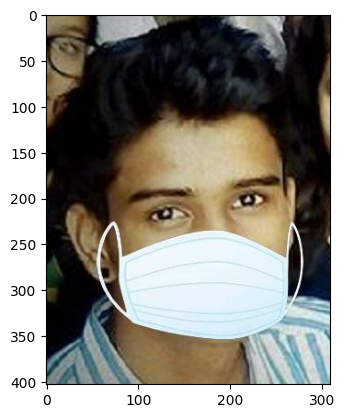

In [14]:
img = mpimg.imread('/content/data/with_mask/with_mask_1000.jpg')
imgplot = plt.imshow(img)
plt.show()

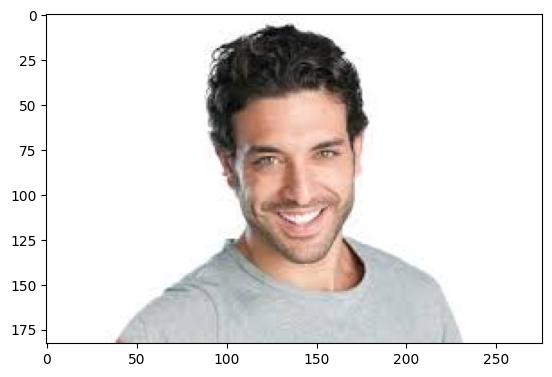

In [15]:
img = mpimg.imread('/content/data/without_mask/without_mask_1000.jpg')
imgplot = plt.imshow(img)
plt.show()

image processing
1. resize the image
2. convert the images to numpy arrays

In [16]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [17]:
type(data)

list

In [18]:
len(data)

7553

array([[[251, 255, 255],
        [253, 255, 255],
        [255, 255, 253],
        ...,
        [ 55,  61,  54],
        [ 32,  36,  50],
        [ 48,  50,  76]],

       [[252, 255, 255],
        [254, 255, 255],
        [255, 255, 254],
        ...,
        [108, 122,  90],
        [ 43,  48,  51],
        [ 54,  56,  77]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 254],
        ...,
        [105, 122,  86],
        [ 46,  52,  50],
        [ 53,  56,  73]],

       ...,

       [[255, 255, 245],
        [251, 255, 251],
        [251, 254, 255],
        ...,
        [ 59,  58, 110],
        [ 60,  60, 112],
        [ 61,  61, 114]],

       [[254, 255, 249],
        [251, 255, 248],
        [252, 254, 252],
        ...,
        [ 61,  61, 111],
        [ 59,  59, 111],
        [ 58,  58, 111]],

       [[254, 254, 254],
        [252, 255, 250],
        [253, 255, 249],
        ...,
        [ 64,  64, 114],
        [ 66,  65, 117],
        [ 65,  63, 116]]], dtype=uint8)
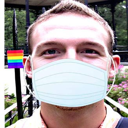

In [19]:
data[0]

In [20]:
type(data[0])

numpy.ndarray

In [21]:
data[0].shape

(128, 128, 3)

In [22]:
#converting data list and labels list to numpy array
X = np.array(data)
Y = np.array(labels)

In [23]:
type(X)
 #numpy n dimensional array

numpy.ndarray

In [24]:
type(Y)

numpy.ndarray

In [25]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


Train and Test

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [27]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [28]:
#scaling
X_train_scaled = X_train/255
X_test_scaled = X_test/255

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [228, 234, 238],
        [228, 238, 244],
        [230, 236, 239]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [227, 233, 227],
        [225, 233, 228],
        [231, 235, 234]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [238, 239, 234],
        [235, 236, 232],
        [233, 233, 231]]], dtype=uint8)
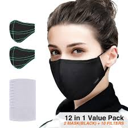

In [29]:
X_train[0]

In [30]:
X_train_scaled[0]

array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       ...,

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1

**Building The Neural network**
num_of_classes is no. of neuron in output layer like 1 neuron for mask and 1 neuron for without mask

In [31]:
import tensorflow as tf
from tensorflow import keras

In [32]:
num_of_classes = 2
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3))) #32 is filter size
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu')) #32 is filter size
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu')) #128 is no. of neuron it can be only in power of 2 like 256,128 etc
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid')) #num_of_classes is no. of neuron


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
#compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [35]:
#training model
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.9499 - loss: 0.1275 - val_acc: 0.9207 - val_loss: 0.1920
Epoch 2/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - acc: 0.9455 - loss: 0.1495 - val_acc: 0.9223 - val_loss: 0.2199
Epoch 3/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - acc: 0.9689 - loss: 0.0896 - val_acc: 0.9372 - val_loss: 0.1916
Epoch 4/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - acc: 0.9705 - loss: 0.0842 - val_acc: 0.9140 - val_loss: 0.2470
Epoch 5/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.9719 - loss: 0.0883 - val_acc: 0.9355 - val_loss: 0.1916
Epoch 6/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - acc: 0.9768 - loss: 0.0534 - val_acc: 0.9240 - val_loss: 0.2829
Epoch 7/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - acc: 0.9758 - loss: 0.0688 - val_acc: 0.9339 - val_loss: 0.2018
Epoch 8/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - acc: 0.9782 - loss: 0.0684 - val_acc: 0.9488 - val_loss: 0.1661
Epoch 9/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/

Model Evaluation

In [36]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - acc: 0.9277 - loss: 0.3269
Test Accuracy = 0.9252150654792786


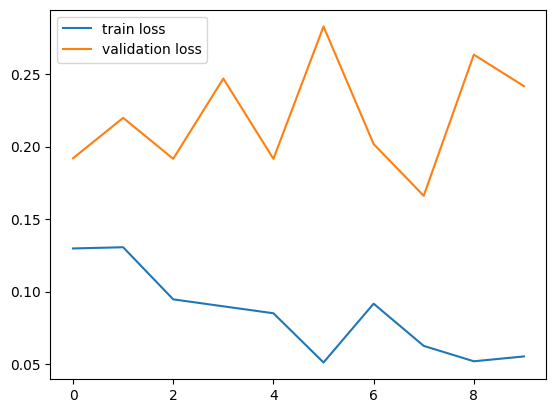

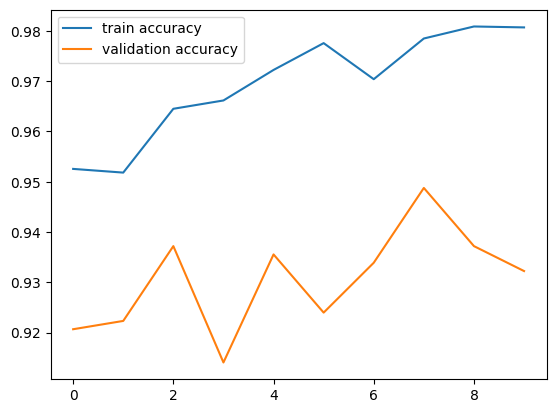

In [40]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Predictive system


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3] )#here 1 is no of image as input you are giving

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/360_F_243123463_zTooub557xEWABDLk0jJklDyLSGl2jrr.jpg


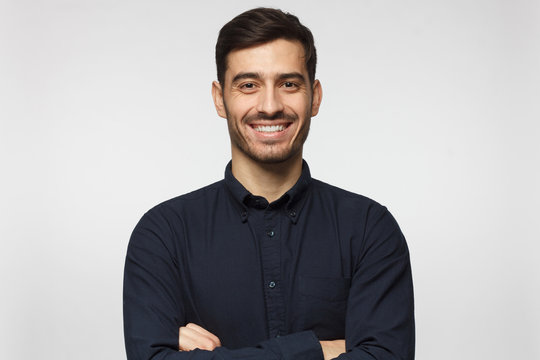

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[[0.34060007 0.3968628 ]]
1
The person in the image is wearing a mask


In [44]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3] )#here 1 is no of image as input you are giving

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')